In [1]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

from __future__ import print_function
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam
from keras import backend as K

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

def plot_autoencoder_outputs(autoencoder, x_test, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

    (x_train, y_train), (x_test, y_test) = mnist.load_data()

def own_kullback_leibler_divergence(y_true, y_pred):
    y_true = K.clip(y_true, K.epsilon(), 1)
    y_pred = K.clip(y_pred, K.epsilon(), 1)
    return K.sum(y_true * K.log(y_true / y_pred), axis=-1)

def own_mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

def own_loss(y_true, y_pred):
    return own_kullback_leibler_divergence(y_true, y_pred)*0.05+own_mean_squared_error(y_true, y_pred)


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

x_9_list=[]
for i in range(len(y_train)):
    if (y_train[i] == 9):
        x_9_list.append(x_train[i])
x_9=np.asarray(x_9_list[:5000])
x_9_list_test=[]
for i in range(len(y_test)):
    if (y_test[i] == 9):
        x_9_list_test.append(x_test[i])
x_9_test=np.asarray(x_9_list_test[:500])

x_train=x_9
x_test=x_9_test

print(x_train.shape)
print(x_test.shape)

input_size = 784
code_size = 49

input_img = Input(shape=(input_size,))
code = Dense(code_size, use_bias = False, activation='relu')(input_img)
output_img = Dense(input_size, use_bias = False, activation='sigmoid')(code)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss=own_loss)

autoencoder.fit(x_train, x_train, epochs=20)

for i in range(len(autoencoder.get_weights())):
    print(len(autoencoder.get_weights()[i]))

plot_autoencoder_outputs(autoencoder, x_test, 5, (28, 28))

weights = autoencoder.get_weights()[0].T

n = 9
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

/home/hoffmann/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(5000, 784)
(500, 784)
Epoch 1/20
5000/5000 [==============================] - 1s 102us/step - loss: -0.3665
Epoch 2/20
5000/5000 [==============================] - 0s 86us/step - loss: -0.8151
Epoch 3/20
5000/5000 [==============================] - 0s 87us/step - loss: -0.8532
Epoch 4/20
5000/5000 [==============================] - 0s 78us/step - loss: -0.8729
Epoch 5/20
5000/5000 [==============================] - 0s 92us/step - loss: -0.8860
Epoch 6/20
5000/5000 [==============================] - 0s 89us/step - loss: -0.8943
Epoch 7/20
5000/5000 [==============================] - 0s 85us/step - loss: -0.9004
Epoch 8/20
5000/5000 [==============================] - 0s 89us/step - loss: -0.9058
Epoch 9/20
5000/5000 [==============================] - 0s 78us/step - loss: -0.9098
Epoch 10/20
5000/5000 [==============================] - 0s 84us/step - loss: -0.9146
Epoch 11/20
5000/5000 [==============================] - 0s 82us/step - loss: -0.9186
Epoch 12/20
5000/5000 [================

<Figure size 1000x450 with 10 Axes>

<Figure size 2000x500 with 9 Axes>

784
pups
pups


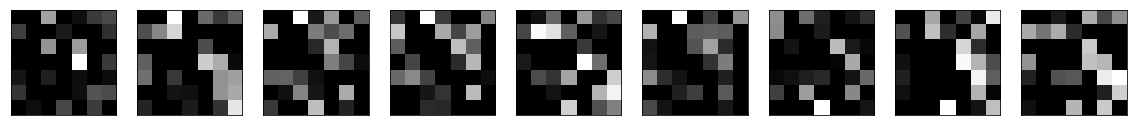

In [2]:
    input_img_2 = Input(shape=(input_size,))
    code_2 = Dense(code_size, activation='relu', use_bias = False)(input_img_2)
    output_img_2 = Dense(input_size, activation='sigmoid', use_bias = False)(code)

    #hidden_1_2.set_weights(weights)

    autoencoder_2 = Model(input_img_2, code_2)
    coding = autoencoder_2.predict(x_test)
    
    for i in range(len(autoencoder_2.get_weights())):
        print(len(autoencoder_2.get_weights()[i]))
    
    for i in range(2):
        autoencoder_2.layers[i].set_weights(autoencoder.layers[i].get_weights())
        print('pups')

    n = 9
    plt.figure(figsize=(20, 5))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(coding[i].reshape(7, 7))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


In [3]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 49)                38416     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               38416     
Total params: 76,832
Trainable params: 76,832
Non-trainable params: 0
_________________________________________________________________


In [4]:
print(len(autoencoder.get_weights()[0]))

784


In [5]:
print(len(autoencoder.get_weights()[0][0]))

49


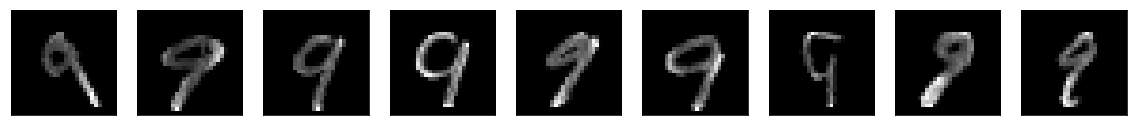

In [6]:
a = np.zeros((784))
w = autoencoder.get_weights()[0]

for i in range(784):
    for j in range(49):
        a[i]+=w[i][j]**2
        
a=np.sqrt(a)

ww = np.zeros((500,784))

for i in range(500):
    for j in range(784):
        ww[i][j]=x_test[i][j]*a[j]
        
n = 9
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(ww[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


583 2.623516214321495
584 2.4289812428578585
611 2.428111703802383
612 2.4118460393826506
746 2.3756700117447282
639 2.373970142378484
745 2.3381604650773724
159 2.3327904090713916
747 2.329427901618851
744 2.3203491900538356
[583, 584, 611, 612, 746, 639, 745, 159, 747, 744]


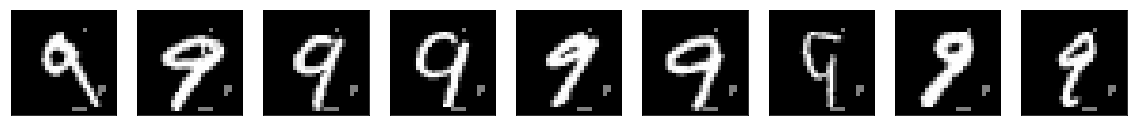

In [7]:
b = np.argsort(a)
c = []
for i in range(10):
    c.append(b[-i-1])
    print(b[-i-1], a[b[-i-1]])

print(c)

x_temp = x_test

for i in range(len(x_test)):
    for j in c:
        x_temp[i][j]=0.5
        
n = 9
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_temp[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
